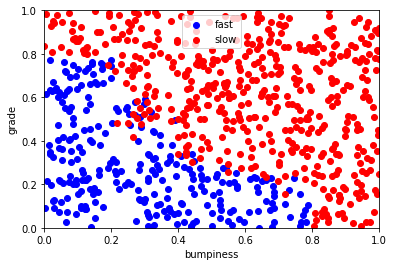

training time: 0.029 s
predicting time: 0.004 s
accuarcy= 0.928
number of features: 2


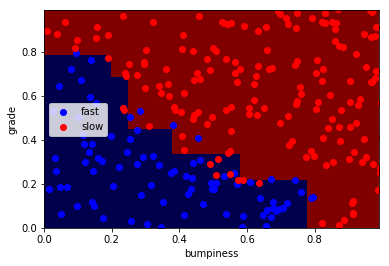

In [26]:
#!/usr/bin/python

import matplotlib.pyplot as plt
from prep_terrain_data import makeTerrainData
from class_vis import prettyPicture

features_train, labels_train, features_test, labels_test = makeTerrainData()


### the training data (features_train, labels_train) have both "fast" and "slow"
### points mixed together--separate them so we can give them different colors
### in the scatterplot and identify them visually
grade_fast = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==0]
bumpy_fast = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==0]
grade_slow = [features_train[ii][0] for ii in range(0, len(features_train)) if labels_train[ii]==1]
bumpy_slow = [features_train[ii][1] for ii in range(0, len(features_train)) if labels_train[ii]==1]


#### initial visualization
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.scatter(bumpy_fast, grade_fast, color = "b", label="fast")
plt.scatter(grade_slow, bumpy_slow, color = "r", label="slow")
plt.legend()
plt.xlabel("bumpiness")
plt.ylabel("grade")
plt.show()
################################################################################


### your code here!  name your classifier object clf if you want the 
### visualization code (prettyPicture) to show you the decision boundary
import time
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=15,random_state=15,learning_rate=1.01)

t0 = time.time()
clf = clf.fit(features_train,labels_train)
print "training time:", round(time.time()-t0, 3), "s"

t1 = time.time()
pred=clf.predict(features_test)
print "predicting time:", round(time.time()-t1, 3), "s"

from sklearn.metrics import accuracy_score
acc =accuracy_score(pred, labels_test)

print "accuarcy=",acc
print "number of features:",len(features_train[0])

################################################################################
try:
    prettyPicture(clf, features_test, labels_test)
except NameError:
    pass
